**Assignment 1: Perceptron**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Assignments
```

4. Move the 01_assignment_perceptron_multiclass.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Assignments
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Assignments/01_assignment_perceptron.ipynb
```

In this assignment, you will implement both binary and multiclass perceptron classifiers from scratch.
You will test your implementations on the digits dataset from scikit-learn. The assignment is divided
into three main parts:

1. Implementing a binary perceptron for digit classification (0 vs 1)
2. Implementing a multiclass perceptron for full digits classification (0-9)
3. Comparing your implementations with scikit-learn's Perceptron


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Report your validation and testing scores. For full credit, your testing scores should be higher than 0.9.

```
Report validation and testing scores here.
```

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

In [1]:
import numpy as np
import sklearn.datasets as skdata
from sklearn.linear_model import Perceptron
import sklearn.metrics as skmetrics
from sklearn.model_selection import train_test_split
import warnings, time
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
np.random.seed(42)

In [2]:
class BinaryPerceptron:
    '''
    Implementation of Binary Perceptron
    '''

    def __init__(self):
        self.__weights = None

    def __update(self, x, y):
        '''
        Update weights for misclassified examples

        Arg(s):
            x : numpy.ndarray
                Feature vector of shape d x 1
            y : int
                Label/target (-1 or 1)
        '''

        # TODO: Implement weight update rule for binary perceptron
        self.__weights += y*x

    def fit(self, x, y, max_iter=100):
        '''
        Fit the binary perceptron to training data

        Arg(s):
            x : numpy.ndarray
                Features of shape d x N
            y : numpy.ndarray
                Labels/targets of shape 1 x N
            max_iter : int
                Maximum number of iterations
        '''

        n_features, n_samples = x.shape

        # TODO: Initialize weights (including a bias term, w0) as zeros vector with shape d+1 x 1
        self.__weights = np.zeros((n_features+1, 1))

        # TODO: Append artificial coordinate (x0) to the data
        x = np.vstack((np.ones((1, n_samples)), x))

        # TODO: Implement training loop

        for _ in range(max_iter):
            n_updates = 0

            # Process each sample
            for n in range(n_samples):
                # TODO: Calculate prediction
                sample = x[:,n].reshape(-1,1) # d+1 x 1
                target = y[0,n]
                
                pred = np.dot(self.__weights.T, sample)
                pred = 1 if pred > 0 else -1
                # TODO: Update weights if misclassified

                if pred != target:
                    self.__update(sample, target)
                    n_updates += 1


            # TODO: Break if no updates were made, e.g., check for convergence
            if n_updates == 0:
                break


    def predict(self, x):
        '''
        Make predictions

        Arg(s):
            x : numpy.ndarray
                Features of shape d x N

        Returns:
            numpy.ndarray : Predicted labels (-1 or 1) of 1 x N
        '''

        n_features, n_samples = x.shape

        # TODO: Append artificial coordinate (x0) to the data
        x = np.vstack((np.ones((1, n_samples)), x))

        # TODO: Implement prediction logic
        return np.sign(np.dot(self.__weights.T, x))

    def score(self, x, y):
        '''
        Calculate prediction accuracy

        Arg(s):
            x : numpy.ndarray
                Features of shaped d x N
            y : numpy.ndarray
                Labels/targets of shape 1 x N

        Returns:
            float: Accuracy score
        '''

        # TODO: Implement accuracy calculation
        pred = self.predict(x)
        return np.mean(pred == y)
        


In [3]:
class MulticlassPerceptron:
    '''
    Implementation of Multiclass Perceptron using one-vs-rest strategy
    '''

    def __init__(self):
        self.__weights = None
        self.__n_classes = None

    def __update(self, x, y, y_hat):
        '''
        Update weights for misclassified examples

        Arg(s):
            x : numpy.ndarray
                Feature vector of shape d x 1
            y : int
                Label/target (-1 or 1)
            y_hat : int
                Predicted label (-1 or 1)
        '''

        # TODO: Implement weight update rule for multiclass case
        if y != y_hat:
            self.__weights[:, y] += x.flatten()
            self.__weights[:, y_hat] -= x.flatten()
        


    def fit(self, x, y, max_iter=100):
        '''
        Fit the multiclass perceptron to training data

        Arg(s):
            x : numpy.ndarray)
                Feature vector of shape d x N
            y : numpy.ndarray
                Label/target (0, 1, 2, ... C-1) of shape 1 x N
            max_iter : int
                Maximum number of iterations
        '''

        n_features, n_samples = x.shape

        # TODO: Get number of classes from unique values in y
        self.__n_classes = len(np.unique(y))

        # TODO: Initialize weights matrix of zeros with shape d+1 x C
        self.__weights = np.zeros((n_features+1, self.__n_classes))

        # TODO: Append artificial coordinate (x0) to the data such that it is d+1 x N
        x = np.vstack((np.ones((1, n_samples)), x))

        # TODO: Implement training loop
        for _ in range(max_iter):
            n_updates = 0

            # Process each sample
            for n in range(n_samples):
                # TODO: Calculate scores and make prediction for each class
                sample = x[:,n].reshape(-1,1)
                actual = y[0,n] 
                
                scores = np.dot(self.__weights.T, sample)
                pred = np.argmax(scores)
                
                if pred != actual:
                    self.__update(sample, actual, pred)
                    n_updates += 1
                

            # TODO: Break if no updates were made, e.g., check for convergence
            if n_updates == 0:
                break


    def predict(self, x):
        '''
        Make predictions on new data

        Arg(s):
            x : numpy.ndarray
                Features of shape d x N

        Returns:
            numpy.ndarray : Predicted class labels
        '''

        n_features, n_samples = x.shape

        # TODO: Append artificial coordinate (x0) to the data
        x = np.vstack((np.ones((1, n_samples)), x))

        # TODO: Implement prediction logic for multiclass case
        scores = np.dot(self.__weights.T, x)
        predictions = np.argmax(scores, axis=0) 
        return predictions.reshape(1, -1)

    def score(self, x, y):
        '''
        Calculate prediction accuracy

        Arg(s):
            x : numpy.ndarray
                Features of shape d x N
            y : numpy.ndarray
                Label/target (0, 1, 2, ... C-1) of shape 1 x N

        Returns:
            float : Accuracy score
        '''
        predictions = self.predict(x)
        return np.mean(predictions == y)


In [4]:
def prepare_binary_digits_data(digits_zero=0, digits_one=1):
    '''
    Prepare binary classification dataset from digits

    Args:
        digits_zero : int
            First digit to classify
        digits_one : int
            Second digit to classify

    Returns:
        tuple: (X_train, y_train, X_val, y_val, X_test, y_test)
            X_train : N x d
            y_train : N x 1
            X_val : M x d
            y_val : M x 1
            X_test : P x d
            y_test : P x 1
    '''

    # Load digits dataset using sklearn.datasets
    digits = skdata.load_digits()

    # Select only the two specified digits
    mask = np.isin(digits.target, [digits_zero, digits_one])
    X = digits.data[mask]
    y = digits.target[mask]

    # Convert labels to -1/1
    y = np.where(y == digits_zero, -1, 1)

    # Split into train (60%), validation (20%), and test (20%) sets using random_state=42
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    return X_train, np.expand_dims(y_train, axis=-1), X_val, np.expand_dims(y_val, axis=-1), X_test, np.expand_dims(y_test, axis=-1)



In [5]:
def prepare_multiclass_digits_data():
    '''
    Prepare multiclass classification dataset from digits

    Returns:
        tuple: (X_train, y_train, X_val, y_val, X_test, y_test)
            X_train : N x d
            y_train : N x 1
            X_val : M x d
            y_val : M x 1
            X_test : P x d
            y_test : P x 1
    '''

    # Load digits dataset using sklearn.datasets
    digits = skdata.load_digits()
    X, y = digits.data, digits.target

    # Split into train (60%), validation (20%), and test (20%) sets with random_state=42
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    return X_train, np.expand_dims(y_train, axis=-1), X_val, np.expand_dims(y_val, axis=-1), X_test, np.expand_dims(y_test, axis=-1)



Binary Classification Experiment (0 vs 1)
--------------------------------------------------
Max iterations: 10, Validation accuracy: 1.0000
Max iterations: 50, Validation accuracy: 1.0000
Max iterations: 100, Validation accuracy: 1.0000

Best model test accuracy: 0.9861


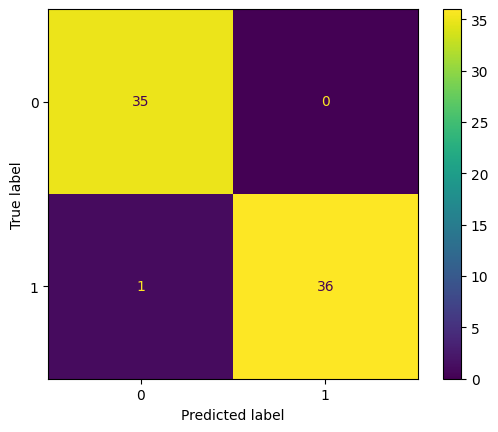

Scikit-learn Perceptron test accuracy: 1.0000


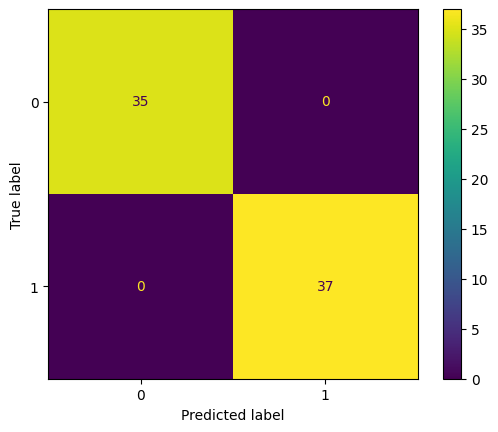


Multiclass Classification Experiment (0-9)
--------------------------------------------------
Max iterations: 10, Validation accuracy: 0.9472
Max iterations: 50, Validation accuracy: 0.9556
Max iterations: 100, Validation accuracy: 0.9583

Best model test accuracy: 0.9611


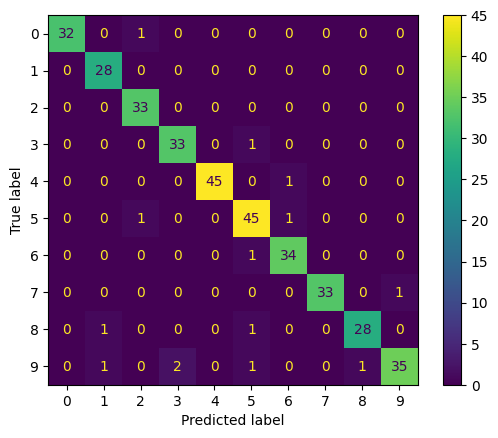

Scikit-learn Perceptron test accuracy: 0.9361


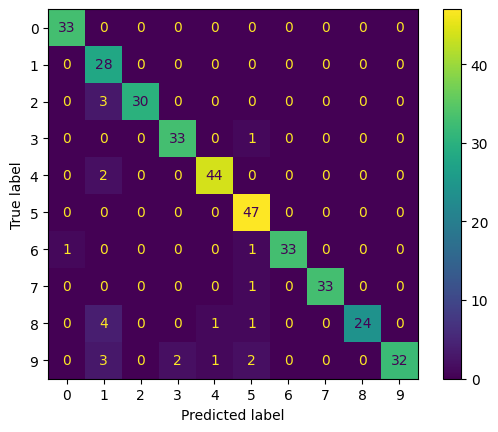

In [6]:
# Binary classification experiment
print("Binary Classification Experiment (0 vs 1)")
print("-" * 50)

labels = [0, 1]

# Load and prepare binary data (0 vs 1)
X_train, y_train, X_val, y_val, X_test, y_test = prepare_binary_digits_data(0, 1)

# Try different max_iter values
max_iters = [10, 50, 100]
best_val_score = 0
best_model = None


for max_iter in max_iters:
    # TODO: Initialize and train binary perceptron
    model = BinaryPerceptron()
    model.fit(X_train.T, y_train.T, max_iter=max_iter)
    # TODO: Calculate validation score
    val_score = model.score(X_val.T, y_val.T)
    print("Max iterations: {}, Validation accuracy: {:.4f}".format(max_iter, val_score))

    # TODO: Update best_model if current model performs better
    if val_score > best_val_score:
        best_val_score = val_score
        best_model = model


# TODO: Test best model on test set
test_score = best_model.score(X_test.T, y_test.T)
print("\nBest model test accuracy: {:.4f}".format(test_score))

# TODO: Create a confusion matrix using skmetrics.confusion_matrix for your model on the test set
conf_matrix = skmetrics.confusion_matrix(y_test, best_model.predict(X_test.T).reshape(-1))
conf_matrix_plot = skmetrics.ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
conf_matrix_plot.plot()

# Show confusion matrix
plt.show()
time.sleep(1)

# TODO: Compare with scikit-learn implementation by training with max_iter=10 and random_state=42 and testing on the test set
sk_model = Perceptron(max_iter=10, random_state=42)
sk_model.fit(X_train, y_train)
sk_score = sk_model.score(X_test, y_test)
print("Scikit-learn Perceptron test accuracy: {:.4f}".format(sk_score))

# TODO: Create a confusion matrix using skmetrics.confusion_matrix for scikit model on the test set
conf_matrix2 = skmetrics.confusion_matrix(y_test, sk_model.predict(X_test))
conf_matrix_plot2 = skmetrics.ConfusionMatrixDisplay(conf_matrix2, display_labels=labels)
conf_matrix_plot2.plot()

# Show confusion matrix
plt.show()
time.sleep(1)


print("\nMulticlass Classification Experiment (0-9)")
print("-" * 50)

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Load and prepare multiclass data
X_train, y_train, X_val, y_val, X_test, y_test = prepare_multiclass_digits_data()

# Try different max_iter values
max_iters = [10, 50, 100]
best_val_score = 0
best_model = None

for max_iter in max_iters:
    # TODO: Initialize and train multiclass perceptron
    model = MulticlassPerceptron()
    model.fit(X_train.T, y_train.T, max_iter=max_iter)
    # TODO: Calculate validation score
    val_score = model.score(X_val.T, y_val.T)
    print("Max iterations: {}, Validation accuracy: {:.4f}".format(max_iter, val_score))

    # TODO: Update best_model if current model performs better
    if val_score > best_val_score:
        best_val_score = val_score
        best_model = model


# TODO: Test best model on test set
test_score = best_model.score(X_test.T, y_test.T)
print("\nBest model test accuracy: {:.4f}".format(test_score))

# TODO: Create a confusion matrix using skmetrics.confusion_matrix for your model on the test set
conf_matrix = skmetrics.confusion_matrix(y_test, best_model.predict(X_test.T).reshape(-1))
conf_matrix_plot = skmetrics.ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
conf_matrix_plot.plot()

# Show confusion matrix
plt.show()
time.sleep(1)

# TODO: Compare with scikit-learn implementation by training with max_iter=10 and random_state=42 and testing on the test set
sk_model = Perceptron(max_iter=10, random_state=42)
Perceptron.fit(sk_model, X_train, y_train)
sk_score = sk_model.score(X_test, y_test)
print("Scikit-learn Perceptron test accuracy: {:.4f}".format(sk_score))

# TODO: Create a confusion matrix using skmetrics.confusion_matrix for your model on the test set
conf_matrix2 = skmetrics.confusion_matrix(y_test, sk_model.predict(X_test))
conf_matrix_plot2 = skmetrics.ConfusionMatrixDisplay(conf_matrix2, display_labels=labels)
conf_matrix_plot2.plot()


# Show confusion matrix
plt.show()
time.sleep(1)